<a href="https://colab.research.google.com/github/Martinccv/Proyecto_final_DS/blob/main/Proyecto_final_Grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3er entrega - Sistemas de recomendación

En esta entrega vamos a trabajar con un sistema de recomendación.

Vamos a aprovechar la competencia de Telecom que vimos ya que los datos son reales y están buenos para practicar.

En el siguiente repositorio pueden encontrar el significado de cada columna de los datasets:
https://github.com/Datathon2021/Recomendador

Consigna:

- Dividir set en train y test. Tomar como train los datos hasta el 1 de marzo de 2021. Desde el 1ro de marzo en adelante, reservar para test.
- Desarrollar un recomendador. El recomendador debe ser capaz de generar recomendaciones para TODOS los usuarios (incluyendo los cold start que no tengan visualizaciones en el set de train). Generar 20 recomendaciones por usuario.
- Las recomendaciones tienen que ser para cada account_id y hay que recomendar content_id (NO asset_id). Pueden encontrar esto en el repositorio de la competencia.
- Los contenidos que recomienden, no tienen que haber sido vistos previamente por los usuarios (filtrar).
- Evaluarlo con MAP.

Recomendaciones:
- En este caso no tenemos ratings explícitos como los casos que vimos, deben generar ustedes estos ratings mediante algún criterio. Lo más simple podría ser utilizar ratings binarios (lo vió / no lo vió).
- Hay una columna que nos indica hasta cuando va a estar disponible el contenido
- La columna **end_vod_date**: "fecha de finalización de la disponibilidad del activo en la plataforma" puede llegar a serles muy útil. ¿Tiene sentido recomendar algo que no va a estar disponible en el set de test? (a partir del 1 de marzo de 2021).
- Comiencen con algo SIMPLE. No se compliquen con todas las columnas que tiene el dataset. No van a necesitar usar todas, muchas columnas podrán descartarlas dependiendo del enfoque que tomen.

Datos:
- Se encuentran adjuntos en la entrega

Fecha de entrega: 21/08/2024.

Pueden subirlo a un repositorio de github (público) y subir el link. De paso les sirve para ir armando su perfil de github con algunos proyectos 😉.



# CONTENIDO DE LOS ARCHIVOS CSV

## train1.csv
Este dataset contiene los registros de visualizaciones de contenidos de Flow del formato video on demand (VOD), correspondiente a una muestra aleatoria de más de 113 mil perfiles. A continuación, se detalla el diccionario de variables de esta tabla:

- **customer_id:** código de identificación de cada cliente de Flow (puede tener asociados uno o más account_id)
- **account_id:** código de identificación de cada perfil de Flow (se corresponde con un único customer_id)
- **device_type:** indica el tipo de dispositivo desde el que se efectuó la visualización. Las categorías posibles son:
   - **CLOUD:** cliente web
   - **PHONE:** teléfono celular
   - **STATIONARY:** smart TV
   - **STB:** set-top box, el decodificador Flow
   - **TABLET**
- **asset_id:** código de identificación de cada activo (video) disponible en la plataforma
- **tunein:** fecha y hora de inicio de cada visualización
- **tuneout:** fecha y hora de finalización de cada visualización
- **resume:** variable dummy que indica si se reanuda un consumo anterior del mismo asset_id

## metadata.csv
Contiene la metadata asociada a cada uno de los contenidos. Las variables incluidas son:

- **asset_id:** código de identificación de cada activo (video) disponible en Flow
- **content_id:** código de identificación que agrupa los distintos asset_id asociados a un mismo contenido (por ejemplo, cada episodio de una misma serie tiene su propio asset_id, mientras que la serie se identifica con un content_id único)
- **title:** título
- **reduced_title:** título reducido
- **episode_title:** título del episodio (válido para contenidos episódicos, como las series)
- **show_type:** tipo de show - las categorías son autorreferenciales con excepción de “Rolling”, que indica que se trata de una serie incompleta, y “Web”, la cual remite a contenidos pensados íntegramente en formato digital (series web) -
- **released_year:** año de lanzamiento
- **country_of_origin:** país de origen – expresado con el código de dos letras propio del estándar internacional de normalización ISO 3166 -
- **category:** categoría o género al que pertenece el contenido - puede haber una o más -
- **keywords:** palabras clave o tags asociadas al contenido - puede haber una o más -
- **description:** descripción (sinopsis)
- **reduced_desc:** descripción (sinopsis) reducida
- **cast_first_name:** nombre y apellido de los actores y actrices principales
- **credits_first_name:** nombre y apellido del director o directora
- **run_time_min:** duración total, expresada en minutos
- **audience:** audiencia target
- **made_for_tv:** variable dummy que indica si el contenido fue hecho para TV
- **close_caption:** variable dummy que indica si el contenido posee subtítulos
- **sex_rating:** variable dummy que indica si el contenido tiene escenas de sexo explícitas
- **violence_rating:** variable dummy que indica si el contenido tiene escenas de violencia explícitas
- **language_rating:** variable dummy que indica si el contenido posee lenguaje que puede ser considerado ofensivo o inapropiado
- **dialog_rating:** variable dummy que indica si el contenido posee diálogos que pueden ser considerado ofensivos o inapropiados
- **fv_rating:** variable dummy que indica si el contenido tiene rating de FV, que corresponde a público infantil con violencia ficticia
- **pay_per_view:** variable dummy que indica si se trata de un alquiler
- **pack_premium_1:** variable dummy que indica si se trata de un contenido exclusivo del pack premium 1
- **pack_premium_2:** variable dummy que indica si se trata de un contenido exclusivo del pack premium 2
- **create_date:** fecha de creación del activo
- **modify_date:** fecha de modificación del activo
- **start_vod_date:** fecha desde la cual el activo se encuentra disponible en la plataforma
- **end_vod_date:** fecha de finalización de la disponibilidad del activo en la plataforma

# Instalamos e importamos los paquetes necesarios para ejecutar el codigo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Subimos y leemos los archivos csv para realizar un vistazo de los datos que contiene

In [ ]:
pip install gdown

In [ ]:
!gdown --id "1SPQCapiWcpsQr7pb_4WCKCg70XWMKpbM" --output train.csv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1SPQCapiWcpsQr7pb_4WCKCg70XWMKpbM
From (redirected): https://drive.google.com/uc?id=1SPQCapiWcpsQr7pb_4WCKCg70XWMKpbM&confirm=t&uuid=13fcecc7-cdda-4622-bbc2-18fc1c350f03
To: /content/train.csv
100% 251M/251M [00:03<00:00, 69.6MB/s]


In [ ]:
df_train = pd.read_csv('/content/train.csv')

In [ ]:
!git --version

git version 2.34.1


Traemos los csv del repositorio de github

In [ ]:
!git init
!git remote add origin https://github.com/Martinccv/Proyecto_final_DS.git
!git config core.sparsecheckout true
!git sparse-checkout set data.csv
!git pull origin main #puede ser master
!git checkout

Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.
From https://github.com/Martinccv/Proyecto_final_DS
 * branch            main       -> FETCH_HEAD
	data.csv/metadata.csv

After fixing the above paths, you may want to run `git sparse-checkout reapply`.
Error downloading object: data.csv/train1.csv (0c89f26): Smudge error: Error downloading data.csv/train1.csv (0c89f26c2b4268b0e9319db520d85409fda24f51589ea6e39c1968c0c0c036d7): batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.

Errors logged to /content/.git/lfs/logs/20240821T184044.912055668.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: data.csv/train1.csv: smudge filter lfs failed
fatal: You are on a branch yet to be born


In [ ]:
# Dada la imposibilidad de traer el train desde GITHUB, utilizamos DRIVE
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df_train = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
# df_train=pd.read_csv('/content/data.csv/train1.csv')

In [ ]:
df_train.shape

(3657801, 7)

In [ ]:
df_train.head()

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume
0,0,90627,STATIONARY,18332.0,2021-02-18 22:52:00.0,2021-02-18 23:35:00.0,0
1,0,90627,STATIONARY,24727.0,2021-03-24 23:17:00.0,2021-03-25 00:01:00.0,0
2,1,3387,STB,895.0,2021-03-15 10:05:00.0,2021-03-15 10:23:00.0,0
3,1,3387,STB,895.0,2021-03-15 10:23:00.0,2021-03-15 11:18:00.0,1
4,1,3387,STB,26062.0,2021-03-16 09:24:00.0,2021-03-16 09:44:00.0,0


In [ ]:
df_metadata=pd.read_csv('/content/data.csv/metadata.csv', sep=';')

In [ ]:
df_metadata.shape

(33144, 30)

In [ ]:
df_metadata.head()

,asset_id,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,...,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date
0,15188,0.0,Ep:17 Tiempos Compulsivos,Tiempos_Compul_E17,Episodio 17,Serie,2012.0,AR,Drama,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...",...,N,N,N,N,N,N,2017-12-01T10:18:15.0Z,2019-01-26T06:37:18.0Z,2017-12-01T00:00:00.0Z,2020-12-01T23:59:59.0Z
1,24940,1.0,7 Cajas,7_Cajas,NaN,Película,2012.0,PY,Suspenso/Acción,"Latinoamérica,Pobreza,Crimen,Pandillas",...,N,N,N,Y,N,N,2017-12-19T20:58:15.0Z,2019-09-17T19:02:03.0Z,2017-12-15T00:00:00.0Z,2022-12-14T23:59:59.0Z
2,21939,2.0,La Maldición de las Hormigas Gigantes,La_Maldicion_de_las,NaN,Película,2016.0,FI,Terror/Comedia,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...",...,N,N,N,N,N,N,2018-02-16T13:51:07.0Z,2020-04-28T14:16:38.0Z,2018-01-25T00:00:00.0Z,2020-12-01T23:59:59.0Z
3,9005,3.0,Una Mujer Fantástica,Una_Mujer_Fantastic,NaN,Película,2017.0,CL,Drama,"LGBT,Mujeres,Latinoamérica",...,N,N,N,N,Y,N,2018-05-26T11:58:44.0Z,2019-11-15T03:00:23.0Z,2018-05-27T00:00:00.0Z,2021-04-30T23:59:59.0Z
4,7391,4.0,Star Trek,Star_Trek,NaN,Película,2009.0,US,Ciencia Ficción/Aventura,"Fantasía,Galaxia,Futurismo,Aliens,Criaturas",...,N,N,N,Y,N,N,2019-05-03T20:07:24.0Z,2020-04-09T04:37:29.0Z,2019-05-02T00:00:00.0Z,2020-12-31T23:59:59.0Z


# HACEMOS UN ANALISIS EXPLORATORIO DE DATOS DE LOS DATAFRAME TRAIN Y METADATA

In [ ]:
df_metadata.audience.unique()

array(['General', 'Juvenil', 'Preescolar', 'Teens', 'Hombres', 'Familiar',
       'Niños', 'Mujeres', 'Gaming', 'NIños', nan], dtype=object)

In [ ]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   asset_id            33144 non-null  int64  
 1   content_id          33123 non-null  float64
 2   title               33144 non-null  object 
 3   reduced_title       33144 non-null  object 
 4   episode_title       28997 non-null  object 
 5   show_type           33140 non-null  object 
 6   released_year       33144 non-null  float64
 7   country_of_origin   33140 non-null  object 
 8   category            33144 non-null  object 
 9   keywords            33142 non-null  object 
 10  description         33142 non-null  object 
 11  reduced_desc        33144 non-null  object 
 12  cast_first_name     24412 non-null  object 
 13  credits_first_name  20590 non-null  object 
 14  run_time_min        33144 non-null  float64
 15  audience            33143 non-null  object 
 16  made

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657801 entries, 0 to 3657800
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  int64  
 1   account_id   int64  
 2   device_type  object 
 3   asset_id     float64
 4   tunein       object 
 5   tuneout      object 
 6   resume       int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 195.3+ MB


In [ ]:
df_train.isna().sum()

,0
customer_id,0
account_id,0
device_type,29
asset_id,22
tunein,0
tuneout,0
resume,0


In [ ]:
df_metadata.isna().sum()

,0
asset_id,0
content_id,21
title,0
reduced_title,0
episode_title,4147
show_type,4
released_year,0
country_of_origin,4
category,0
keywords,2


In [ ]:
df_train.customer_id.nunique()

112340

In [ ]:
train_df = df_train.copy()
metadata_df = df_metadata.copy()

In [ ]:
# Primero, agrupar por Audiencia y contamos los content_id únicos
audience_count = df_metadata.groupby('audience')['content_id'].nunique().reset_index()

# Renombrar la columna para mayor claridad
audience_count.columns = ['audience', 'content_id_count']
# Ordenar de manera descendiente
audience_count_sort = audience_count.sort_values(ascending=False, by='content_id_count')
audience_count_sort

,audience,content_id_count
2,General,2667
4,Juvenil,449
3,Hombres,389
5,Mujeres,376
0,Familiar,226
9,Teens,167
7,Niños,122
8,Preescolar,59
1,Gaming,1
6,NIños,1


<ipython-input-23-f66e4b56e02a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=audience_count_sort, x='audience', y='content_id_count', palette='viridis')


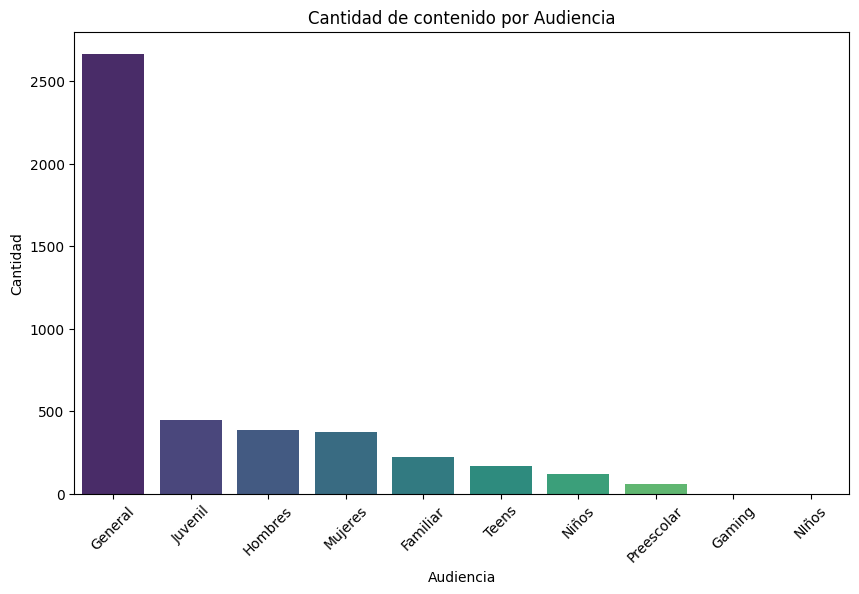

In [ ]:
# Grafica el resultado utilizando el DataFrame ordenado
plt.figure(figsize=(10, 6))
sns.barplot(data=audience_count_sort, x='audience', y='content_id_count', palette='viridis')
plt.title('Cantidad de contenido por Audiencia')
plt.xlabel('Audiencia')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Primero, agrupar por categoría y contar los content_id únicos
category_count = df_metadata.groupby('category')['content_id'].nunique().reset_index()

# Renombrar la columna para mayor claridad
category_count.columns = ['category', 'content_id_count']
#Ordenar y filtrar por las 20 categorías mas importantes
category_count_sort = category_count.sort_values(ascending=False, by='content_id_count').head(20)
category_count_sort

,category,content_id_count
94,Drama,474
42,Comedia,326
113,Drama/Romance,175
142,Infantil/Dibujos Animados,163
60,Comedia/Romance,160
73,Documental,136
51,Comedia/Drama,132
138,Infantil/Animación,130
114,Drama/Suspenso,128
102,Drama/Crimen,123


<ipython-input-25-184f4d419ffe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_count_sort, x='category', y='content_id_count', palette='viridis')


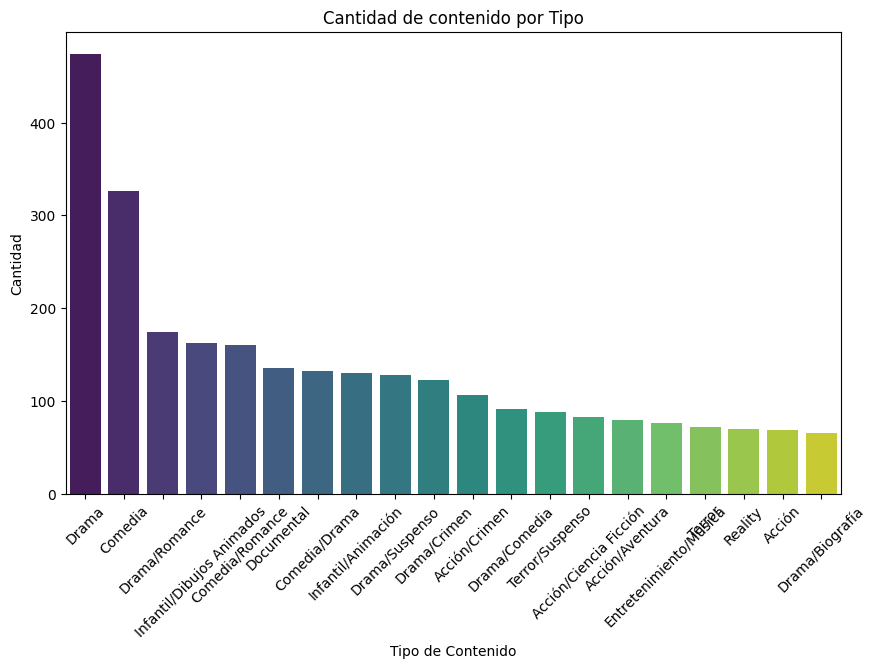

In [ ]:
# Grafica el resultado utilizando el DataFrame ordenado
plt.figure(figsize=(10, 6))
sns.barplot(data=category_count_sort, x='category', y='content_id_count', palette='viridis')
plt.title('Cantidad de contenido por Tipo')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Primero, agrupar por show_type y contar los content_id únicos
content_count = df_metadata.groupby('show_type')['content_id'].nunique().reset_index()

# Renombrar la columna para mayor claridad
content_count.columns = ['show_type', 'content_id_count']
content_count_sort=content_count.sort_values(ascending=False, by='content_id_count')
content_count_sort

,show_type,content_id_count
1,Película,3121
5,TV,714
3,Serie,429
7,Web,67
0,Gaming,34
2,Rolling,13
4,"Series,Serie",2
6,Tutorial,0


<ipython-input-27-9d0431a2ec01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=content_count_sort, x='show_type', y='content_id_count', palette='viridis')


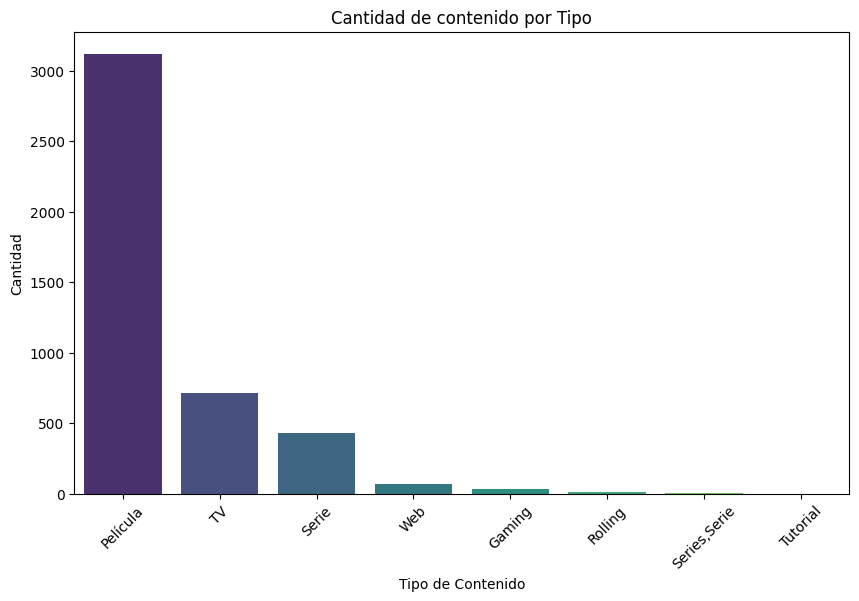

In [ ]:
# Graficar el resultado
plt.figure(figsize=(10, 6))
sns.barplot(data=content_count_sort, x='show_type', y='content_id_count', palette='viridis')
plt.title('Cantidad de contenido por Tipo')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Primero, agrupar por Año de Creación y contar los content_id únicos
released_count = df_metadata.groupby('released_year')['content_id'].nunique().reset_index()

# Renombrar la columna para mayor claridad
released_count.columns = ['released_year', 'content_id_count']
released_count_sort = released_count.sort_values(ascending=False, by='content_id_count').head(30)
released_count_sort

,released_year,content_id_count
72,2019.0,704
71,2018.0,590
73,2020.0,501
70,2017.0,425
69,2016.0,330
68,2015.0,239
67,2014.0,228
66,2013.0,228
65,2012.0,171
64,2011.0,148


<ipython-input-29-672fb28dd669>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=released_count_sort, x='released_year', y='content_id_count', palette='viridis')


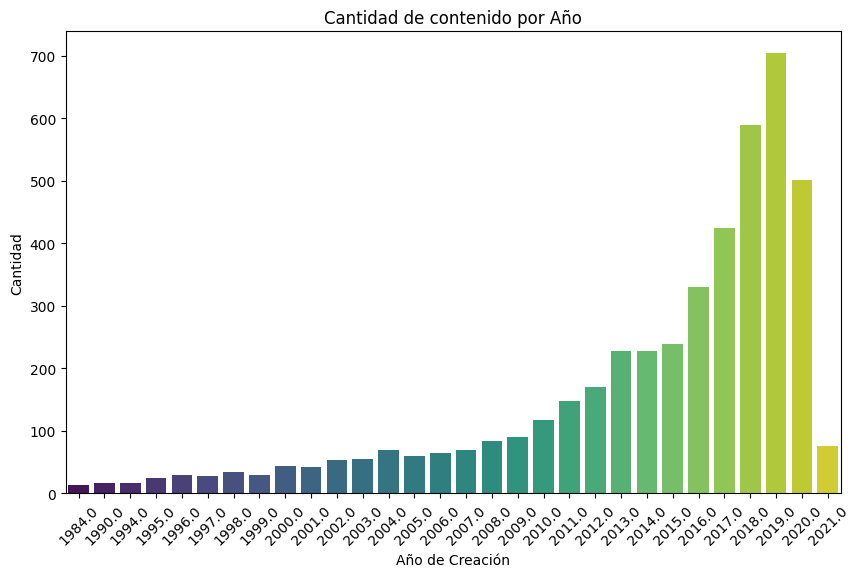

In [ ]:
# Graficar el resultado
plt.figure(figsize=(10, 6))
sns.barplot(data=released_count_sort, x='released_year', y='content_id_count', palette='viridis')
plt.title('Cantidad de contenido por Año')
plt.xlabel('Año de Creación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Identificación de columnas relevantes
## Para train1.csv:
- **customer_id:** Podría ser útil si estamos interesados en análisis a nivel de cliente, pero para recomendaciones específicas de perfil, no es necesario.
- **account_id:** Necesario para identificar los perfiles que recibirán las recomendaciones.
- **device_type:** Podríamos excluirlo si no es relevante para la recomendación.
- **asset_id:** Necesario para mapear visualizaciones a contenidos específicos.
- **tunein y tuneout:** tunein es crucial para dividir en train y test. Luego de la división, podríamos excluir ambas.
- **resume:** Esta columna indica si la visualización es una reanudación, lo cual puede no ser relevante.

## Para metadata.csv:
- **asset_id y content_id:** Crucial para mapear los activos con el contenido.
- **title, category, keywords:** Útiles si queremos basar recomendaciones en contenido similar.
- **start_vod_date, end_vod_date:** Necesarios para filtrar contenidos que estén disponibles.
- Otras columnas como **cast_first_name**, **credits_first_name**, etc., pueden ser excluidas si no las usamos para el modelo.

In [ ]:
# Seleccionar columnas relevantes en train.csv
train_df = train_df[['account_id', 'asset_id', 'tunein',"tuneout"]]

# Seleccionar columnas relevantes en metadata.csv
metadata_df = metadata_df[['asset_id', 'content_id', 'title', 'category', 'released_year', 'keywords', 'country_of_origin', 'start_vod_date', 'end_vod_date']]
# Verificar la limpieza
print("Columnas seleccionadas en Train Dataset:")
print(train_df.columns)

print("\nColumnas seleccionadas en Metadata Dataset:")
print(metadata_df.columns)


Columnas seleccionadas en Train Dataset:
Index(['account_id', 'asset_id', 'tunein', 'tuneout'], dtype='object')

Columnas seleccionadas en Metadata Dataset:
Index(['asset_id', 'content_id', 'title', 'category', 'released_year',
       'keywords', 'country_of_origin', 'start_vod_date', 'end_vod_date'],
      dtype='object')


In [ ]:
# Convertir la columna 'tunein' en train_df a datetime
train_df['tunein'] = pd.to_datetime(train_df['tunein'], errors='coerce')
train_df['tuneout'] = pd.to_datetime(train_df['tuneout'], errors='coerce')

# Convertir las columnas 'start_vod_date' y 'end_vod_date' en metadata_df a datetime
metadata_df['start_vod_date'] = pd.to_datetime(metadata_df['start_vod_date']).dt.tz_localize(None)
metadata_df['end_vod_date'] = pd.to_datetime(metadata_df['end_vod_date']).dt.tz_localize(None)

# Verificar las conversiones
print("\nTipos de datos en Train Dataset después de la conversión:")
print(train_df.dtypes)

print("\nTipos de datos en Metadata Dataset después de la conversión:")
print(metadata_df.dtypes)



Tipos de datos en Train Dataset después de la conversión:
account_id             int64
asset_id             float64
tunein        datetime64[ns]
tuneout       datetime64[ns]
dtype: object

Tipos de datos en Metadata Dataset después de la conversión:
asset_id                      int64
content_id                  float64
title                        object
category                     object
released_year               float64
keywords                     object
country_of_origin            object
start_vod_date       datetime64[ns]
end_vod_date         datetime64[ns]
dtype: object


In [ ]:
# Definir si el usuario vio o no el contenido, teniendo en cuenta el tiempo de visualizacion

# Calcular la diferencia en minutos
train_df['viewing_time'] = (train_df['tuneout'] - train_df['tunein']).dt.total_seconds() / 60.0

# Crear la columna 'watched' (1 si lo vio más de 10 minutos, 0 si no lo vio)
train_df['watched'] = (train_df['viewing_time'] > 10).astype(int)

# Mostrar el DataFrame con las nuevas columnas
print(train_df[['tunein', 'tuneout', 'viewing_time', 'watched']])

                     tunein             tuneout  viewing_time  watched
0       2021-02-18 22:52:00 2021-02-18 23:35:00          43.0        1
1       2021-03-24 23:17:00 2021-03-25 00:01:00          44.0        1
2       2021-03-15 10:05:00 2021-03-15 10:23:00          18.0        1
3       2021-03-15 10:23:00 2021-03-15 11:18:00          55.0        1
4       2021-03-16 09:24:00 2021-03-16 09:44:00          20.0        1
...                     ...                 ...           ...      ...
3657796 2021-03-31 22:10:00 2021-03-31 22:22:00          12.0        1
3657797 2021-03-31 22:22:00 2021-03-31 22:34:00          12.0        1
3657798 2021-03-31 22:34:00 2021-03-31 22:46:00          12.0        1
3657799 2021-03-31 23:09:00 2021-03-31 23:13:00           4.0        0
3657800 2021-03-31 23:13:00 2021-03-31 23:24:00          11.0        1

[3657801 rows x 4 columns]


In [ ]:
# Filtrar los datos de train y test basados en la fecha de tunein
fecha_corte = pd.Timestamp('2021-03-01').tz_localize(None)
train_data = train_df[train_df['tunein'] < fecha_corte]
test_data = train_df[train_df['tunein'] >= fecha_corte]

print(f"Tamaño del conjunto de entrenamiento: {train_data.shape}")
print(f"Tamaño del conjunto de prueba: {test_data.shape}")


Tamaño del conjunto de entrenamiento: (2339064, 6)
Tamaño del conjunto de prueba: (1318737, 6)


In [ ]:
metadata_df.head()

,asset_id,content_id,title,category,released_year,keywords,country_of_origin,start_vod_date,end_vod_date
0,15188,0.0,Ep:17 Tiempos Compulsivos,Drama,2012.0,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...",AR,2017-12-01,2020-12-01 23:59:59
1,24940,1.0,7 Cajas,Suspenso/Acción,2012.0,"Latinoamérica,Pobreza,Crimen,Pandillas",PY,2017-12-15,2022-12-14 23:59:59
2,21939,2.0,La Maldición de las Hormigas Gigantes,Terror/Comedia,2016.0,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...",FI,2018-01-25,2020-12-01 23:59:59
3,9005,3.0,Una Mujer Fantástica,Drama,2017.0,"LGBT,Mujeres,Latinoamérica",CL,2018-05-27,2021-04-30 23:59:59
4,7391,4.0,Star Trek,Ciencia Ficción/Aventura,2009.0,"Fantasía,Galaxia,Futurismo,Aliens,Criaturas",US,2019-05-02,2020-12-31 23:59:59


In [ ]:
# Filtrar contenidos que estarán disponibles después del 1 de marzo de 2021
contenidos_disponibles = metadata_df[metadata_df['end_vod_date'] >= fecha_corte]

# Filtrar el conjunto de test para excluir contenidos no disponibles
test_data = test_data[test_data['asset_id'].isin(contenidos_disponibles['asset_id'])]


In [ ]:
train_data.head()

,account_id,asset_id,tunein,tuneout,viewing_time,watched
0,90627,18332.0,2021-02-18 22:52:00,2021-02-18 23:35:00,43.0,1
6,3388,30840.0,2021-01-01 02:22:00,2021-01-01 02:34:00,12.0,1
7,3388,30840.0,2021-01-02 01:02:00,2021-01-02 01:08:00,6.0,0
8,3388,13180.0,2021-01-02 01:08:00,2021-01-02 01:21:00,13.0,1
9,3388,13180.0,2021-01-04 01:32:00,2021-01-04 01:35:00,3.0,0


In [ ]:
contenidos_disponibles.shape

(22777, 9)

In [ ]:
test_data.shape

(1318605, 6)

In [ ]:
# Mapeo de asset_id a content_id
train_data = train_data.merge(metadata_df[['asset_id', 'content_id']], on='asset_id', how='left')
test_data = test_data.merge(metadata_df[['asset_id', 'content_id']], on='asset_id', how='left')
# Verificar que el mapeo se realizó correctamente
print(train_data.head())
print(test_data.head())

   account_id  asset_id              tunein             tuneout  viewing_time  \
0       90627   18332.0 2021-02-18 22:52:00 2021-02-18 23:35:00          43.0   
1        3388   30840.0 2021-01-01 02:22:00 2021-01-01 02:34:00          12.0   
2        3388   30840.0 2021-01-02 01:02:00 2021-01-02 01:08:00           6.0   
3        3388   13180.0 2021-01-02 01:08:00 2021-01-02 01:21:00          13.0   
4        3388   13180.0 2021-01-04 01:32:00 2021-01-04 01:35:00           3.0   

   watched  content_id  
0        1      2040.0  
1        1      2100.0  
2        0      2100.0  
3        1      2100.0  
4        0      2100.0  
   account_id  asset_id              tunein             tuneout  viewing_time  \
0       90627   24727.0 2021-03-24 23:17:00 2021-03-25 00:01:00          44.0   
1        3387     895.0 2021-03-15 10:05:00 2021-03-15 10:23:00          18.0   
2        3387     895.0 2021-03-15 10:23:00 2021-03-15 11:18:00          55.0   
3        3387   26062.0 2021-03-16 09:2

In [ ]:
train_data.watched.value_counts()

,count
watched,
1,1545465
0,793599


In [ ]:
# Filtrar el metadata_df para incluir solo los contenidos que estarán disponibles durante el test
contenidos_disponibles = metadata_df[metadata_df['end_vod_date'] >= fecha_corte]

# Filtrar el conjunto de train para excluir contenidos no disponibles
train_data = train_data[train_data['asset_id'].isin(contenidos_disponibles['asset_id'])]

# Mostrar la cantidad de registros después del filtrado
print(f"Cantidad de registros en train_df después del filtrado: {train_data.shape[0]}")


Cantidad de registros en train_df después del filtrado: 2062336


In [ ]:
test_data = test_data[test_data['asset_id'].isin(contenidos_disponibles['asset_id'])]
# Mostrar la cantidad de registros después del filtrado
print(f"Cantidad de registros en train_df después del filtrado: {test_data.shape[0]}")

Cantidad de registros en train_df después del filtrado: 1318605


In [ ]:
interaction_matrix = pd.pivot_table(train_data[["account_id", "content_id", "watched"]], index='account_id', columns='content_id', values='watched',aggfunc='max').fillna(0)

# Verificar la matriz de interacciones
print("Matriz de interacciones:")
interaction_matrix.head(20)

Matriz de interacciones:


content_id,0.0,1.0,3.0,6.0,7.0,8.0,9.0,11.0,12.0,13.0,...,4357.0,4358.0,4359.0,4360.0,4361.0,4362.0,4363.0,4364.0,4365.0,4366.0
account_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
interactions_matrix_csr = csr_matrix(interaction_matrix.values)
interactions_matrix_csr

<97627x3041 sparse matrix of type '<class 'numpy.float64'>'
	with 437468 stored elements in Compressed Sparse Row format>

In [ ]:
user_ids = list(interaction_matrix.index)
user_dict = {}
counter = 0
for i in user_ids:
    user_dict[i] = counter
    counter += 1

In [ ]:
user_dict

{0: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 10: 8,
 11: 9,
 12: 10,
 13: 11,
 14: 12,
 15: 13,
 16: 14,
 17: 15,
 18: 16,
 19: 17,
 20: 18,
 22: 19,
 23: 20,
 24: 21,
 25: 22,
 27: 23,
 28: 24,
 30: 25,
 31: 26,
 32: 27,
 33: 28,
 34: 29,
 35: 30,
 36: 31,
 37: 32,
 38: 33,
 39: 34,
 40: 35,
 41: 36,
 42: 37,
 44: 38,
 45: 39,
 46: 40,
 47: 41,
 49: 42,
 51: 43,
 52: 44,
 53: 45,
 54: 46,
 55: 47,
 56: 48,
 58: 49,
 59: 50,
 60: 51,
 61: 52,
 62: 53,
 63: 54,
 64: 55,
 65: 56,
 66: 57,
 67: 58,
 69: 59,
 70: 60,
 71: 61,
 72: 62,
 73: 63,
 74: 64,
 75: 65,
 76: 66,
 78: 67,
 79: 68,
 80: 69,
 81: 70,
 82: 71,
 83: 72,
 85: 73,
 87: 74,
 88: 75,
 89: 76,
 90: 77,
 91: 78,
 92: 79,
 93: 80,
 94: 81,
 95: 82,
 96: 83,
 97: 84,
 98: 85,
 101: 86,
 102: 87,
 103: 88,
 104: 89,
 105: 90,
 106: 91,
 107: 92,
 108: 93,
 109: 94,
 110: 95,
 111: 96,
 112: 97,
 113: 98,
 114: 99,
 115: 100,
 116: 101,
 117: 102,
 118: 103,
 119: 104,
 120: 105,
 121: 106,
 122: 107,
 123: 108,
 125:

# TRAEMOS EL ESTIMADOR LIGHTFM Y ENTREMANOS LA MATRIZ DE INTERACCIONES

In [ ]:
pip install lightfm

In [ ]:
from lightfm import LightFM

model = LightFM(no_components=100, random_state=38, learning_rate=0.05, loss='warp', user_alpha=1e-6, item_alpha=1e-6)
model = model.fit(interactions_matrix_csr, epochs=70)

ejemplo de prueba

In [ ]:
user_x = user_dict[18]
n_users, n_items = interaction_matrix.shape
item_ids = np.arange(n_items)
#ACA GENERAMOS PREDICCIONES
preds = model.predict(user_ids=user_x, item_ids = item_ids)

In [ ]:
preds

array([-1.3910731 , -0.9568189 , -2.3383627 , ...,  0.8960739 ,
        0.09663628, -0.8627295 ], dtype=float32)

In [ ]:
scores = pd.Series(preds)
scores.index = interaction_matrix.columns
recomms_18 = list(pd.Series(scores.sort_values(ascending=False).index))[:20]

In [ ]:
recomms_18

[2323.0,
 1314.0,
 2815.0,
 1971.0,
 3863.0,
 3064.0,
 3521.0,
 3174.0,
 2230.0,
 3566.0,
 3146.0,
 3744.0,
 3519.0,
 3411.0,
 3716.0,
 2680.0,
 1993.0,
 2222.0,
 176.0,
 3651.0]

In [ ]:
train18=train_data[train_data.account_id==18].content_id.unique()
train18

array([2815., 3064., 3521., 2323., 3174., 2412., 1314., 3232.,  173.,
       3863., 1971.])

In [ ]:
train_data[(train_data.account_id==18) & (train_data.content_id.isin(recomms_18))].content_id.unique()

array([2815., 3064., 3521., 2323., 3174., 1314., 3863., 1971.])

In [ ]:
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

train_precision = precision_at_k(model, interactions_matrix_csr, k=10).mean()

train_auc = auc_score(model, interactions_matrix_csr).mean()

print(train_precision)
print(train_auc)

0.37949318
0.999913


### COLD START 1
Generamos el cold start en base a los contenidos mas populares sin tener en cuenta genero o show type, directamente se listan los primeros 20 mas populares

In [ ]:
cold_start_df= df_metadata.copy()

In [ ]:
cold_start_df.released_year.max()

2021.0

In [ ]:
cold_start_df.shape

(33144, 30)

In [ ]:
# Cantidad de usuarios nuevos en la plataforma
test_data[~test_data.account_id.isin(train_data.account_id.unique())].account_id.nunique()

15184

In [ ]:
cold_start_df['start_vod_date']= pd.to_datetime(cold_start_df['start_vod_date']).dt.tz_localize(None)
cold_start_df['end_vod_date'] = pd.to_datetime(cold_start_df['end_vod_date']).dt.tz_localize(None)
cold_start_df["released_year"] = pd.to_datetime(cold_start_df["start_vod_date"]).dt.year

In [ ]:
cold_start_df = cold_start_df[cold_start_df['end_vod_date'] >= fecha_corte]

In [ ]:
cold_start_df = cold_start_df[cold_start_df["released_year"] > 2019]

In [ ]:
cold_start_df.shape

(16123, 30)

In [ ]:
train2 = df_train.copy()

In [ ]:
# Filtrar los asset_id de cold_start_df que están presentes en train2
train2_filtrado = train2[train2['asset_id'].isin(cold_start_df['asset_id'])]

# Realizar un merge para añadir content_id desde cold_start_df a train2_filtrado basado en asset_id
train2_mergeado = pd.merge(train2_filtrado, cold_start_df[['asset_id', 'content_id']], on='asset_id', how='left')

# Ver el resultado
print(train2_mergeado.head())


   customer_id  account_id device_type  asset_id                 tunein  \
0            0       90627  STATIONARY   18332.0  2021-02-18 22:52:00.0   
1            0       90627  STATIONARY   24727.0  2021-03-24 23:17:00.0   
2            1        3387         STB     895.0  2021-03-15 10:05:00.0   
3            1        3387         STB     895.0  2021-03-15 10:23:00.0   
4            1        3387         STB   26062.0  2021-03-16 09:24:00.0   

                 tuneout  resume  content_id  
0  2021-02-18 23:35:00.0       0      2040.0  
1  2021-03-25 00:01:00.0       0      2040.0  
2  2021-03-15 10:23:00.0       0      1983.0  
3  2021-03-15 11:18:00.0       1      1983.0  
4  2021-03-16 09:44:00.0       0       729.0  


In [ ]:
train2_mergeado.shape

(2466123, 8)

In [ ]:
train2_mergeado.content_id.value_counts()

,count
content_id,
4133.0,71857
2040.0,70752
1139.0,63938
1316.0,44976
2942.0,43957
...,...
2505.0,1
2498.0,1
4304.0,1


In [ ]:
# Eliminar visualizaciones duplicadas para un mismo account_id y asset_id
train2_sin_duplicados = train2.drop_duplicates(subset=['account_id', 'asset_id'])

# Realizar un merge para agregar el content_id desde cold_start_df a train2_sin_duplicados
train2_mergeado = pd.merge(train2_sin_duplicados, cold_start_df[['asset_id', 'content_id']], on='asset_id', how='left')

# Contar las visualizaciones por content_id
conteo_content = train2_mergeado['content_id'].value_counts()

# Obtener los 20 content_id más vistos
top_20_content = conteo_content.head(20)

# Mostrar el resultado
print(top_20_content)


content_id
2040.0    52880
4133.0    52331
1139.0    36224
3900.0    34370
2942.0    33909
1800.0    25186
3353.0    23772
176.0     22074
729.0     20817
1462.0    20574
3712.0    19933
1316.0    18984
2627.0    18919
774.0     18259
20.0      16861
1983.0    16660
1018.0    14257
116.0     12570
604.0     11851
2742.0    11780
Name: count, dtype: int64


In [ ]:
# Crear la lista de los 20 content_id más vistos
lista_top_20_content = top_20_content.index.tolist()

# Mostrar la lista de los top 20 content_id
print("Lista de los 20 content_id más vistos para cold start:")
lista_top_20_content

Lista de los 20 content_id más vistos para cold start:


[2040.0,
 4133.0,
 1139.0,
 3900.0,
 2942.0,
 1800.0,
 3353.0,
 176.0,
 729.0,
 1462.0,
 3712.0,
 1316.0,
 2627.0,
 774.0,
 20.0,
 1983.0,
 1018.0,
 116.0,
 604.0,
 2742.0]

### COLD START 2:
Generamos el cold start en base a los contenidos mas populares de diferentes generos, para tener mas variantes.
Ademas se eligen 10 peliculas y 10 series para recomendar en base al show type.

In [ ]:
metadata_por_contentID = cold_start_df.drop_duplicates(subset='content_id', keep='first')
# Seleccionamos las columnas que queremos conservar:
columnas_a_mantener = ['content_id', 'show_type', 'category']
metadata_por_contentID = metadata_por_contentID[columnas_a_mantener]
# Mergeamos las columnas de metadata que necesitamos con la popularidad:
df_pop_clase_gen = pd.merge(conteo_content, metadata_por_contentID, on='content_id', how='left')

# Filtramos películas y series
df_peliculas = df_pop_clase_gen[df_pop_clase_gen['show_type'] == 'Película']
df_series = df_pop_clase_gen[df_pop_clase_gen['show_type'] == 'Serie']
#df_tvshow = df_pop_clase_gen[df_pop_clase_gen['show_type'] == 'TV']
#Existen más tipos de show. Se podría verificar de que no quede afuera alguno muy popular.

# Ordenamos por popularidad
df_peliculas = df_peliculas.sort_values(by=['count'], ascending=[False])
df_series = df_series.sort_values(by=['count'], ascending=[False])

In [ ]:
# Lista para almacenar los géneros ya recomendados
generos_recomendados_peliculas = []
generos_recomendados_series = []

# Lista para almacenar los content_id finales
top_peliculas = []
top_series = []

# Iteramos sobre el DataFrame de Películas filtrando los géneros repetidos
for index, row in df_peliculas.iterrows():
    if row['category'] not in generos_recomendados_peliculas:
        top_peliculas.append(row['content_id'])
        generos_recomendados_peliculas.append(row['category'])

# Iteramos sobre el DataFrame de Series filtrando los géneros repetidos
for index, row in df_series.iterrows():
    if row['category'] not in generos_recomendados_series:
        top_series.append(row['content_id'])
        generos_recomendados_series.append(row['category'])

# Seleccionamos los top 10 de cada lista
top_10_peliculas = top_peliculas[:10]
top_10_series = top_series[:10]

# Combinamos ambas listas en una sola
cold_start_list = top_10_peliculas + top_10_series

# Mostramos el resultado
print("Lista Cold Start (Top 10 Películas y Top 10 Series):")
cold_start_list

Lista Cold Start (Top 10 Películas y Top 10 Series):


[3806.0,
 3210.0,
 3381.0,
 3598.0,
 3384.0,
 4362.0,
 1971.0,
 3711.0,
 3550.0,
 3382.0,
 2040.0,
 4133.0,
 3900.0,
 2942.0,
 1800.0,
 1462.0,
 774.0,
 1983.0,
 2742.0,
 2992.0]

In [ ]:
# Filtrar cold_start_df para obtener solo los contenidos con los content_id en top_20_content
filtered_df = cold_start_df[cold_start_df['content_id'].isin(cold_start_list)]

# Mostrar el DataFrame filtrado
filtered_df

,asset_id,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,...,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date
11057,8129,1800.0,Ep:012 Floricienta,Floricienta_E012,Episodio 12,Serie,2020,AR,Comedia/Familiar,"Familia,Melodrama,Optimistas",...,N,N,N,N,N,N,2020-09-09T12:51:05.0Z,2020-09-09T17:06:08.0Z,2020-09-09,2021-03-01 23:59:00
12853,25963,1971.0,Las aventuras del doctor Dolittle,Las_aventuras_del_d,NaN,Película,2021,US,Comedia/Aventura,"Médicos,Mascotas,Animales,Época,Realeza",...,N,N,N,N,N,Y,2021-02-23T10:40:26.0Z,2021-03-02T22:48:37.0Z,2021-02-20,2022-01-13 23:59:59
13142,19216,1983.0,T:1 Ep:04 Big Little Lies,Big_Little_L_T1_E04,Push Comes to Shove,Serie,2021,US,Drama/Crimen,"Crimen,Abusos,Mujeres,De Libros,Feminismo,Gold...",...,N,N,N,N,N,N,2021-03-05T18:06:29.0Z,2021-03-08T01:06:01.0Z,2021-03-08,2021-03-28 23:59:00
13143,1116,1983.0,T:1 Ep:05 Big Little Lies,Big_Little_L_T1_E05,Once Bitten,Serie,2021,US,Drama/Crimen,"Crimen,Abusos,Mujeres,De Libros,Feminismo,Gold...",...,N,N,N,N,N,N,2021-03-05T18:07:33.0Z,2021-03-08T01:06:03.0Z,2021-03-08,2021-03-28 23:59:00
13144,4747,1983.0,T:1 Ep:06 Big Little Lies,Big_Little_L_T1_E06,Burning Love,Serie,2021,US,Drama/Crimen,"Crimen,Abusos,Mujeres,De Libros,Feminismo,Gold...",...,N,N,N,N,N,N,2021-03-05T18:17:35.0Z,2021-03-08T01:06:06.0Z,2021-03-08,2021-03-28 23:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32739,9747,1800.0,Ep:151 Floricienta,Floricienta_E151,Episodio 151,Serie,2021,AR,Comedia/Familiar,"Familia,Melodrama,Optimistas",...,N,N,N,N,N,N,2021-03-25T20:08:32.0Z,2021-03-25T21:06:38.0Z,2021-03-25,2021-05-01 23:59:00
32835,23987,1800.0,Ep:152 Floricienta,Floricienta_E152,Episodio 152,Serie,2021,AR,Comedia/Familiar,"Familia,Melodrama,Optimistas",...,N,N,N,N,N,N,2021-03-26T17:37:33.0Z,2021-03-26T22:06:39.0Z,2021-03-26,2021-05-01 23:59:00
32875,9408,1800.0,Ep:153 Floricienta,Floricienta_E153,Episodio 153,Serie,2021,AR,Comedia/Familiar,"Familia,Melodrama,Optimistas",...,N,N,N,N,N,N,2021-03-27T16:27:46.0Z,2021-03-27T17:06:01.0Z,2021-03-27,2021-05-01 23:59:00
33036,12589,4362.0,Los sonámbulos,Los_sonambulos,NaN,Película,2020,AR,Drama,"Familia,Mujeres,Latinoamérica",...,N,N,N,N,N,N,2020-10-15T12:02:12.0Z,2020-10-15T13:06:02.0Z,2020-10-10,2021-10-10 23:59:00


In [ ]:
# Verificar los resultados
# Primero, agrupar por show_type y contar los content_id únicos
content_count = filtered_df.groupby('show_type')['content_id'].nunique().reset_index()

# Renombrar la columna para mayor claridad
content_count.columns = ['show_type', 'content_id_count']
content_count_sort=content_count.sort_values(ascending=False, by='content_id_count')
content_count_sort

,show_type,content_id_count
0,Película,10
1,Serie,10


In [ ]:
# Primero, agrupar por categoría y contar los content_id únicos
category_count_cold_start = filtered_df.groupby('category')['content_id'].nunique().reset_index()

# Renombrar la columna para mayor claridad
category_count_cold_start.columns = ['category', 'content_id_count']
#Ordenar y filtrar por las 20 categorías mas importantes
category_count_cold_start_sort = category_count_cold_start.sort_values(ascending=False, by='content_id_count').head(20)
category_count_cold_start_sort

,category,content_id_count
8,Drama,2
9,Drama/Acción,2
13,Drama/Romance,2
14,Drama/Suspenso,2
0,Acción/Crimen,1
1,Biografía/Documental,1
2,Comedia,1
3,Comedia/Aventura,1
4,Comedia/Drama,1
5,Comedia/Familiar,1


<ipython-input-75-33b87e7f0abb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_count_cold_start_sort, x='category', y='content_id_count', palette='viridis')


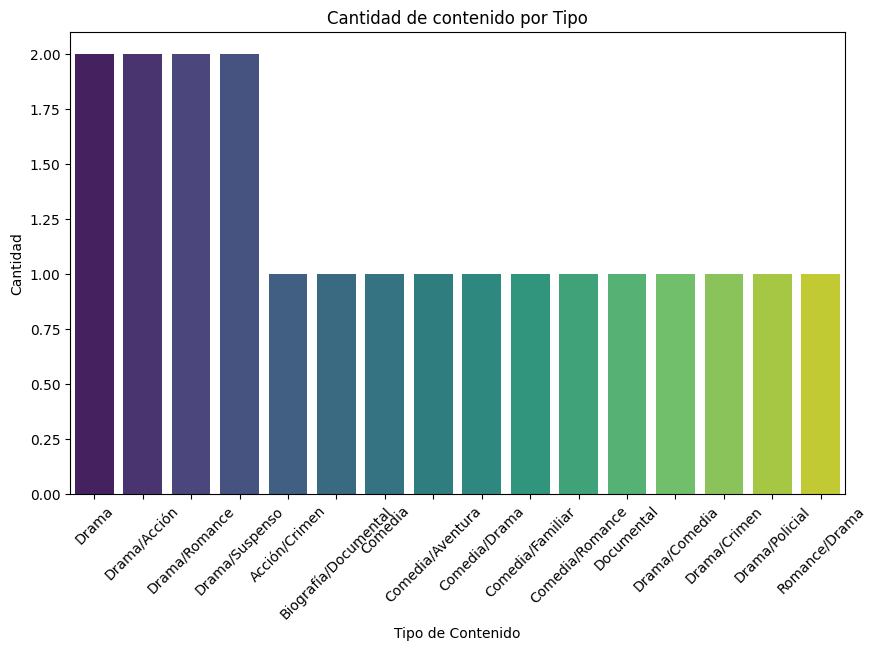

In [ ]:
# Grafica el resultado utilizando el DataFrame ordenado
plt.figure(figsize=(10, 6))
sns.barplot(data=category_count_cold_start_sort, x='category', y='content_id_count', palette='viridis')
plt.title('Cantidad de contenido por Tipo')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from tqdm import tqdm
import random

# Definimos dict donde vamos a ir almacenando las recomendaciones
recomms_dict_test = {
    'user_id': [],
    'recomms': []
}

# Obtenemos cantidad de usuarios y cantidad de items
n_users, n_items = interaction_matrix.shape
item_ids = np.arange(n_items)

# Convertir el índice de interaction_matrix en un conjunto para búsqueda eficiente
user_set = set(interaction_matrix.index)

# Por cada usuario del dataset de test, generamos recomendaciones
for user in tqdm(test_data.account_id.unique()):
    # Validar si el usuario se encuentra en la matriz de interacciones
    if user in user_set:
        # Si el usuario está en train, no es cold start. Usamos el modelo para recomendar
        user_x = user_dict[user]  # Buscar el índice del usuario en la matriz

        # Generar las predicciones para el usuario x
        preds = model.predict(user_ids=user_x, item_ids=item_ids)

        # Ordenar las predicciones de mayor a menor y quedarse con 50
        scores = pd.Series(preds, index=interaction_matrix.columns)
        scores = list(scores.sort_values(ascending=False).index)[:70]

        # Obtener listado de contenidos vistos anteriormente por el usuario en el set de train
        watched_contents_set = set(train_data[train_data.account_id == user].content_id.unique())

        # Filtrar contenidos ya vistos y quedarse con los primeros 20
        recomms = [x for x in scores if x not in watched_contents_set][:20]

        # Guardamos las recomendaciones en el diccionario
        recomms_dict_test['user_id'].append(user)
        recomms_dict_test['recomms'].append(recomms)

    else:
        # Cold start: usar una lista predefinida de recomendaciones de forma aleatoria entre las dos propuestas
        recomms_dict_test['user_id'].append(user)
        recomms_dict_test['recomms'].append(random.choice([lista_top_20_content, cold_start_list]))


100%|██████████| 87625/87625 [10:49<00:00, 134.96it/s]


In [ ]:
recomms_df = pd.DataFrame(recomms_dict_test)
recomms_df

,user_id,recomms
0,90627,"[3900.0, 3806.0, 3210.0, 2160.0, 3381.0, 3598...."
1,3387,"[2040.0, 4133.0, 1139.0, 3900.0, 2942.0, 1800...."
2,3388,"[3057.0, 3712.0, 2094.0, 3324.0, 2002.0, 2617...."
3,3389,"[3900.0, 1140.0, 724.0, 3806.0, 3210.0, 3752.0..."
4,3393,"[3292.0, 36.0, 3743.0, 3361.0, 55.0, 641.0, 15..."
...,...,...
87620,3382,"[3806.0, 3210.0, 3381.0, 3598.0, 3384.0, 4362...."
87621,3383,"[2040.0, 116.0, 3752.0, 3097.0, 3210.0, 3951.0..."
87622,3385,"[3712.0, 2407.0, 2134.0, 3091.0, 2422.0, 3409...."
87623,82934,"[3210.0, 2131.0, 2019.0, 3025.0, 2043.0, 415.0..."


In [ ]:
recomms_df.to_csv('recomms_df.csv', index=False)

In [ ]:
test_data.head()

,account_id,asset_id,tunein,tuneout,viewing_time,watched,content_id
0,90627,24727.0,2021-03-24 23:17:00,2021-03-25 00:01:00,44.0,1,2040.0
1,3387,895.0,2021-03-15 10:05:00,2021-03-15 10:23:00,18.0,1,1983.0
2,3387,895.0,2021-03-15 10:23:00,2021-03-15 11:18:00,55.0,1,1983.0
3,3387,26062.0,2021-03-16 09:24:00,2021-03-16 09:44:00,20.0,1,729.0
4,3387,26062.0,2021-03-16 09:44:00,2021-03-16 09:47:00,3.0,0,729.0


In [ ]:
test_data.shape

(1318605, 7)

In [ ]:
# Filtrar las filas donde 'watched' sea igual a 1
filtered_test_data = test_data[test_data['watched'] == 1]

# Contar las visualizaciones por content_id dentro de cada account_id
filtered_test_data['watch_count'] =filtered_test_data.groupby(['account_id', 'content_id'])['watched'].transform('count')

# Ordenar por 'account_id' y 'watch_count', y agrupar por 'account_id' obteniendo los 'content_id' únicos
ideal_recomms = filtered_test_data\
                  .sort_values(by=["account_id","watch_count"], ascending=False)\
                  .groupby(["account_id"], as_index=False)\
                  .agg({"content_id": "unique"})\
                  .head(1000)

# Mostrar las recomendaciones ideales filtradas
ideal_recomms.head()

<ipython-input-81-fb4e005bf9fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_data['watch_count'] =filtered_test_data.groupby(['account_id', 'content_id'])['watched'].transform('count')


,account_id,content_id
0,2,[433.0]
1,3,"[3980.0, 3702.0, 563.0, 1949.0, 2409.0, 4010.0..."
2,4,"[513.0, 2314.0, 4129.0, 2341.0, 2212.0, 4340.0..."
3,6,"[2900.0, 3211.0, 3386.0, 4065.0, 3388.0]"
4,7,[315.0]


In [ ]:
test_data.head()

,account_id,asset_id,tunein,tuneout,viewing_time,watched,content_id
0,90627,24727.0,2021-03-24 23:17:00,2021-03-25 00:01:00,44.0,1,2040.0
1,3387,895.0,2021-03-15 10:05:00,2021-03-15 10:23:00,18.0,1,1983.0
2,3387,895.0,2021-03-15 10:23:00,2021-03-15 11:18:00,55.0,1,1983.0
3,3387,26062.0,2021-03-16 09:24:00,2021-03-16 09:44:00,20.0,1,729.0
4,3387,26062.0,2021-03-16 09:44:00,2021-03-16 09:47:00,3.0,0,729.0


In [ ]:
ideal_recomms.shape

(1000, 2)

In [ ]:
filtered_test_data.sort_values(by=["watch_count"], ascending=False).head()

,account_id,asset_id,tunein,tuneout,viewing_time,watched,content_id,watch_count
72148,31641,16294.0,2021-03-20 11:20:00,2021-03-20 11:32:00,12.0,1,712.0,564
71907,31641,15158.0,2021-03-12 19:59:00,2021-03-12 20:10:00,11.0,1,712.0,564
71897,31641,10690.0,2021-03-12 15:47:00,2021-03-12 15:59:00,12.0,1,712.0,564
71898,31641,20318.0,2021-03-12 15:59:00,2021-03-12 16:10:00,11.0,1,712.0,564
71899,31641,28515.0,2021-03-12 16:10:00,2021-03-12 16:22:00,12.0,1,712.0,564


In [ ]:
# Corregimos el merge utilizando las columnas adecuadas
df_map = ideal_recomms.merge(
    recomms_df,
    how="left",
    left_on="account_id",
    right_on="user_id"
)[["account_id", "content_id", "recomms"]]

# Renombramos las columnas según tu especificación
df_map.columns = ["user_id", "ideal", "recomms"]

# Mostramos las primeras filas
df_map.head()


,user_id,ideal,recomms
0,2,[433.0],"[2012.0, 3900.0, 37.0, 2946.0, 2040.0, 3346.0,..."
1,3,"[3980.0, 3702.0, 563.0, 1949.0, 2409.0, 4010.0...","[402.0, 2407.0, 2813.0, 4357.0, 3314.0, 1445.0..."
2,4,"[513.0, 2314.0, 4129.0, 2341.0, 2212.0, 4340.0...","[2827.0, 3565.0, 415.0, 1358.0, 3364.0, 3119.0..."
3,6,"[2900.0, 3211.0, 3386.0, 4065.0, 3388.0]","[2946.0, 3716.0, 1625.0, 2409.0, 2040.0, 2356...."
4,7,[315.0],"[1362.0, 2160.0, 3806.0, 4359.0, 1953.0, 3091...."


In [ ]:
aps = [] # lista vacía para ir almacenando la AP de cada recomendación

for pred, label in df_map[["ideal", "recomms"]].values:
  n = len(pred) # cantidad de elementos recomendados
  arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
  rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
  tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
  denom = arange[rel_k] # posiciones donde se encuentran los ítems relevantes
  ap = (tp / denom).sum() / len(label) # average precision
  print(ap)
  aps.append(ap)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.025
0.0
0.0
0.0
0.0
0.0
0.0
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.016666666666666666
0.0
0.0
0.0
0.0
0.05
0.0
0.0
0.0
0.0
0.0
0.0
0.025
0.0
0.0
0.0
0.0
0.0
0.025
0.004545454545454545
0.0
0.0
0.0
0.0
0.0
0.0
0.05
0.0
0.0
0.016666666666666666
0.025
0.05
0.0
0.0
0.0
0.0
0.0
0.0
0.025
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.016666666666666666
0.0
0.0
0.0
0.0
0.0
0.05
0.0
0.0
0.025
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.016666666666666666
0.1
0.025
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05
0.05
0.0
0.0
0.05
0.0
0.0
0.025
0.0
0.007142857142857143
0.0
0.0
0.0
0.0
0.0
0.0125
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.025
0.0
0.0
0.0
0.0
0.0
0.05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.016666666666666666
0.0
0.0
0.05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.025
0.0
0.0
0.0
0.0
0.0
0.025
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05
0

In [ ]:
MAP = np.mean(aps)
print(f'mean average precision = {round(MAP, 5)}')

mean average precision = 0.00735


# Conclusiones
Realizado el listado de recomendaciones pudimos observar que las recomendaciones son muy distantes a los gustos del usuario, es posible que falte agregar datos mas relevantes al estimador, como caracteristicas de los contenidos y de los perfiles, para que se ajuste mejor a los resultados deseados, ya que incluso probando con las metricas que trae el lightfm pudimos observar que aunque aumenten la epochs, se trunca la precision en valores cercanos a 0,4 dando el AUC muy cerca de 1 (posible overfit).

Recomendamos a los lectores probar lo mencionado arriba, ademas de cambiar hiperparametros, filtrar datos, e incluso jugar con otros estimadores para acercarse mas a las recomendaciones que desean los usuarios.